In [39]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [40]:
#loading data
data=pd.read_csv('Wine_clust.csv')

In [3]:
#showing data with heading
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#to find the shape
data.shape

(178, 13)

In [5]:
#to know inforamations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
#to check null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

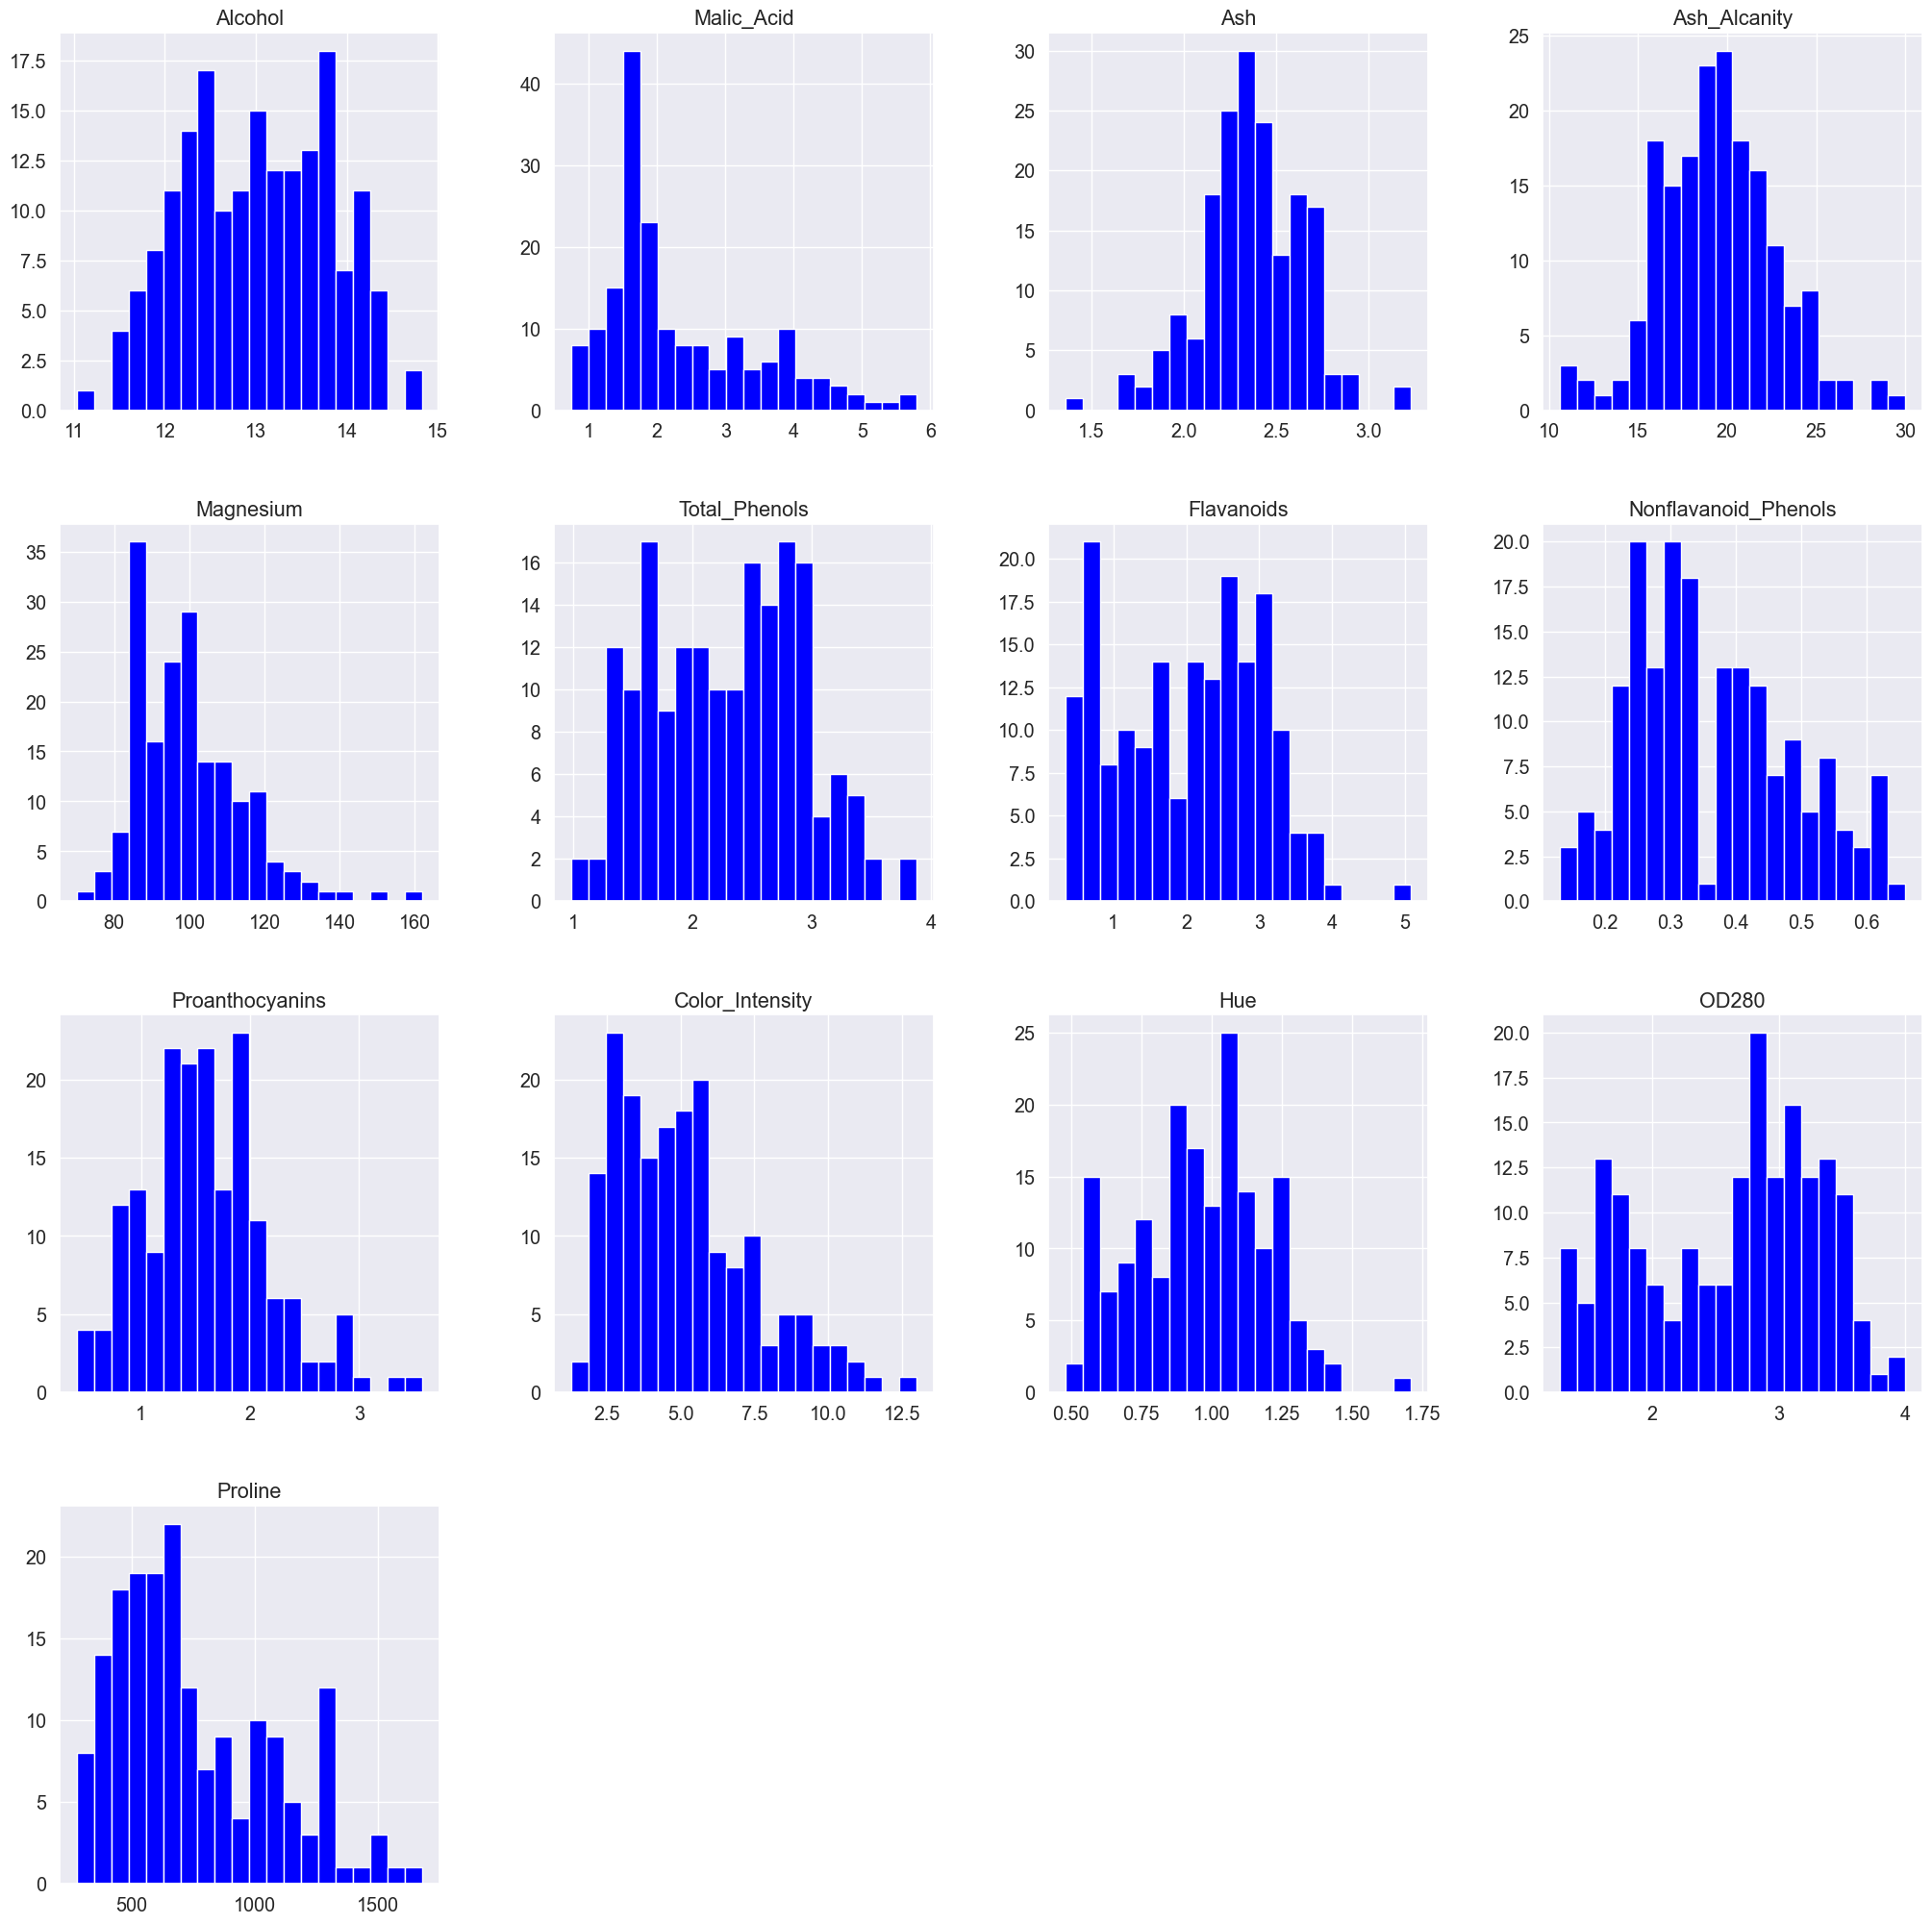

In [10]:
#drawing histograms for each feature
sns.set(style='darkgrid',font_scale=1.3,rc ={'figure.figsize':(25,25)})
ax=data.hist(bins=20,color='blue')

In [11]:
#we will use standardscaling to our data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

Text(0.5, 1.0, 'Scaled data')

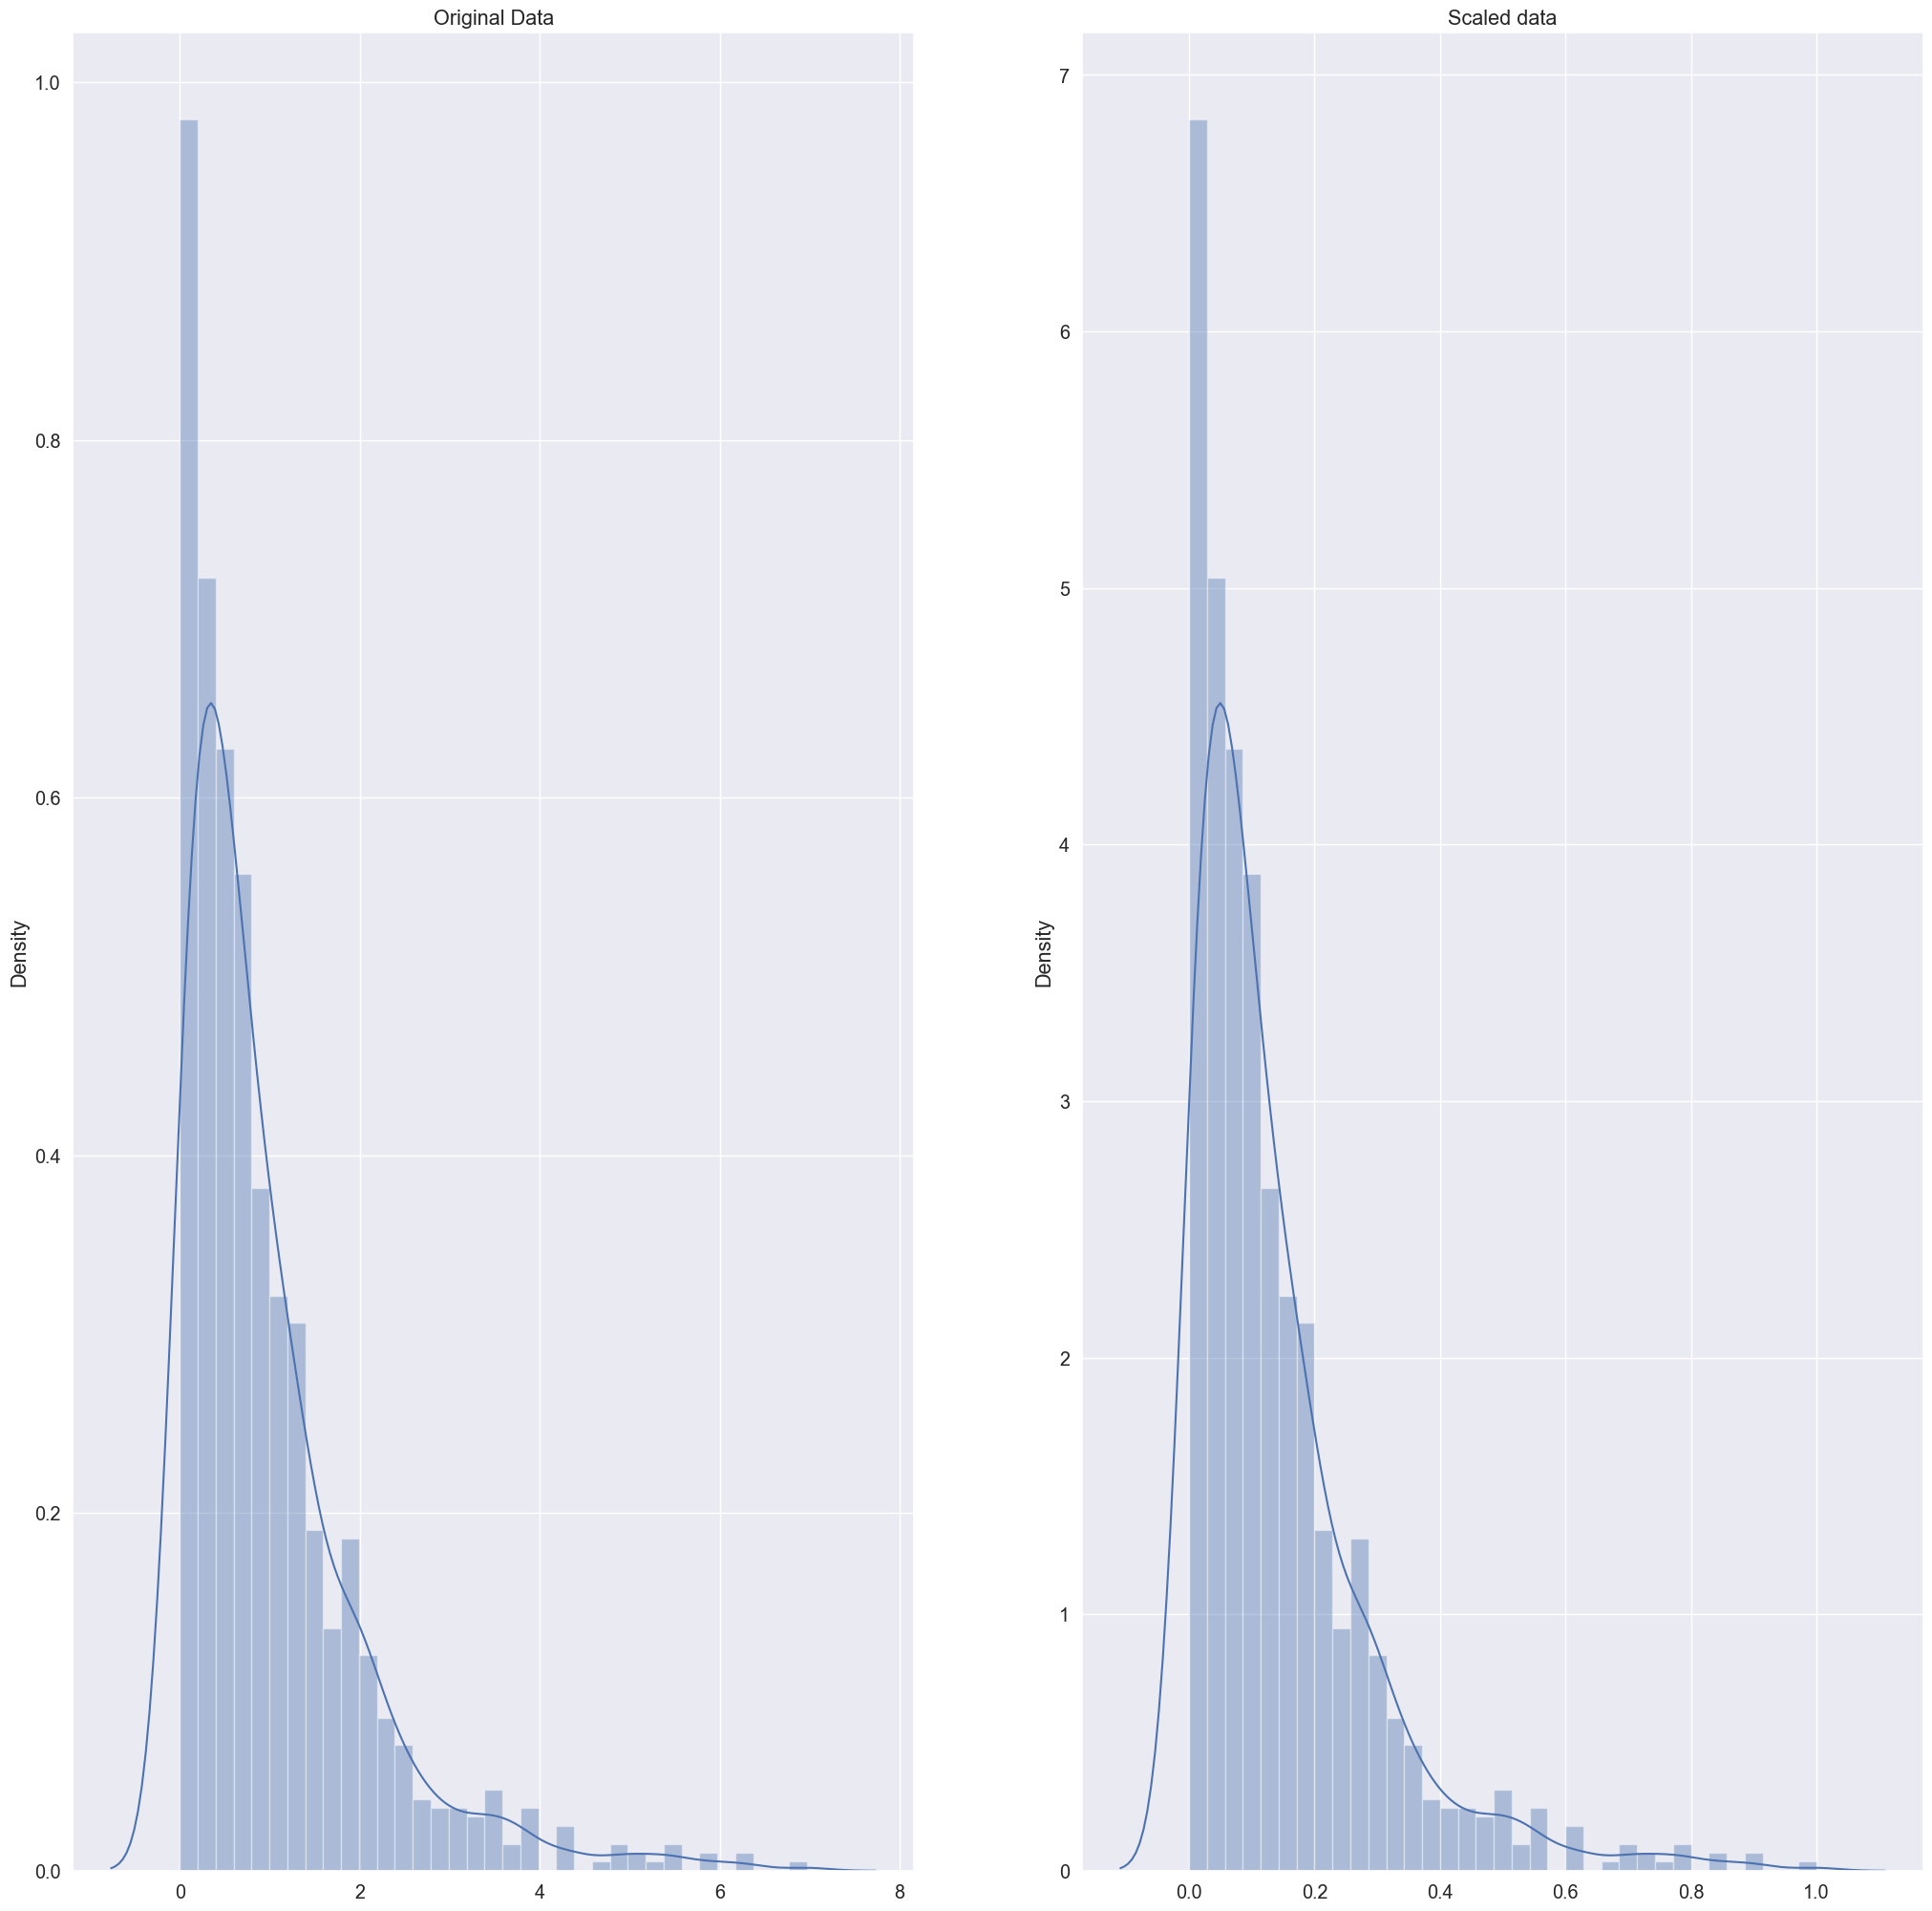

In [114]:
#for scaling
from sklearn.preprocessing import minmax_scale
original_data=np.random.exponential(size=1000)
scaled_data=minmax_scale(original_data)
fig,ax=plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("Scaled data")

In [43]:
data1=data.iloc[:,:].values

In [44]:
type(data1)

numpy.ndarray

# K means Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss=[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init ='k-means++', random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

In [47]:
wcss

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1337029.4929415903,
 916379.187153917,
 647326.0020260846,
 412303.8282508013,
 323223.24705426674,
 270954.9292415375,
 217887.378560333,
 186382.92305063075,
 166245.77997591507]

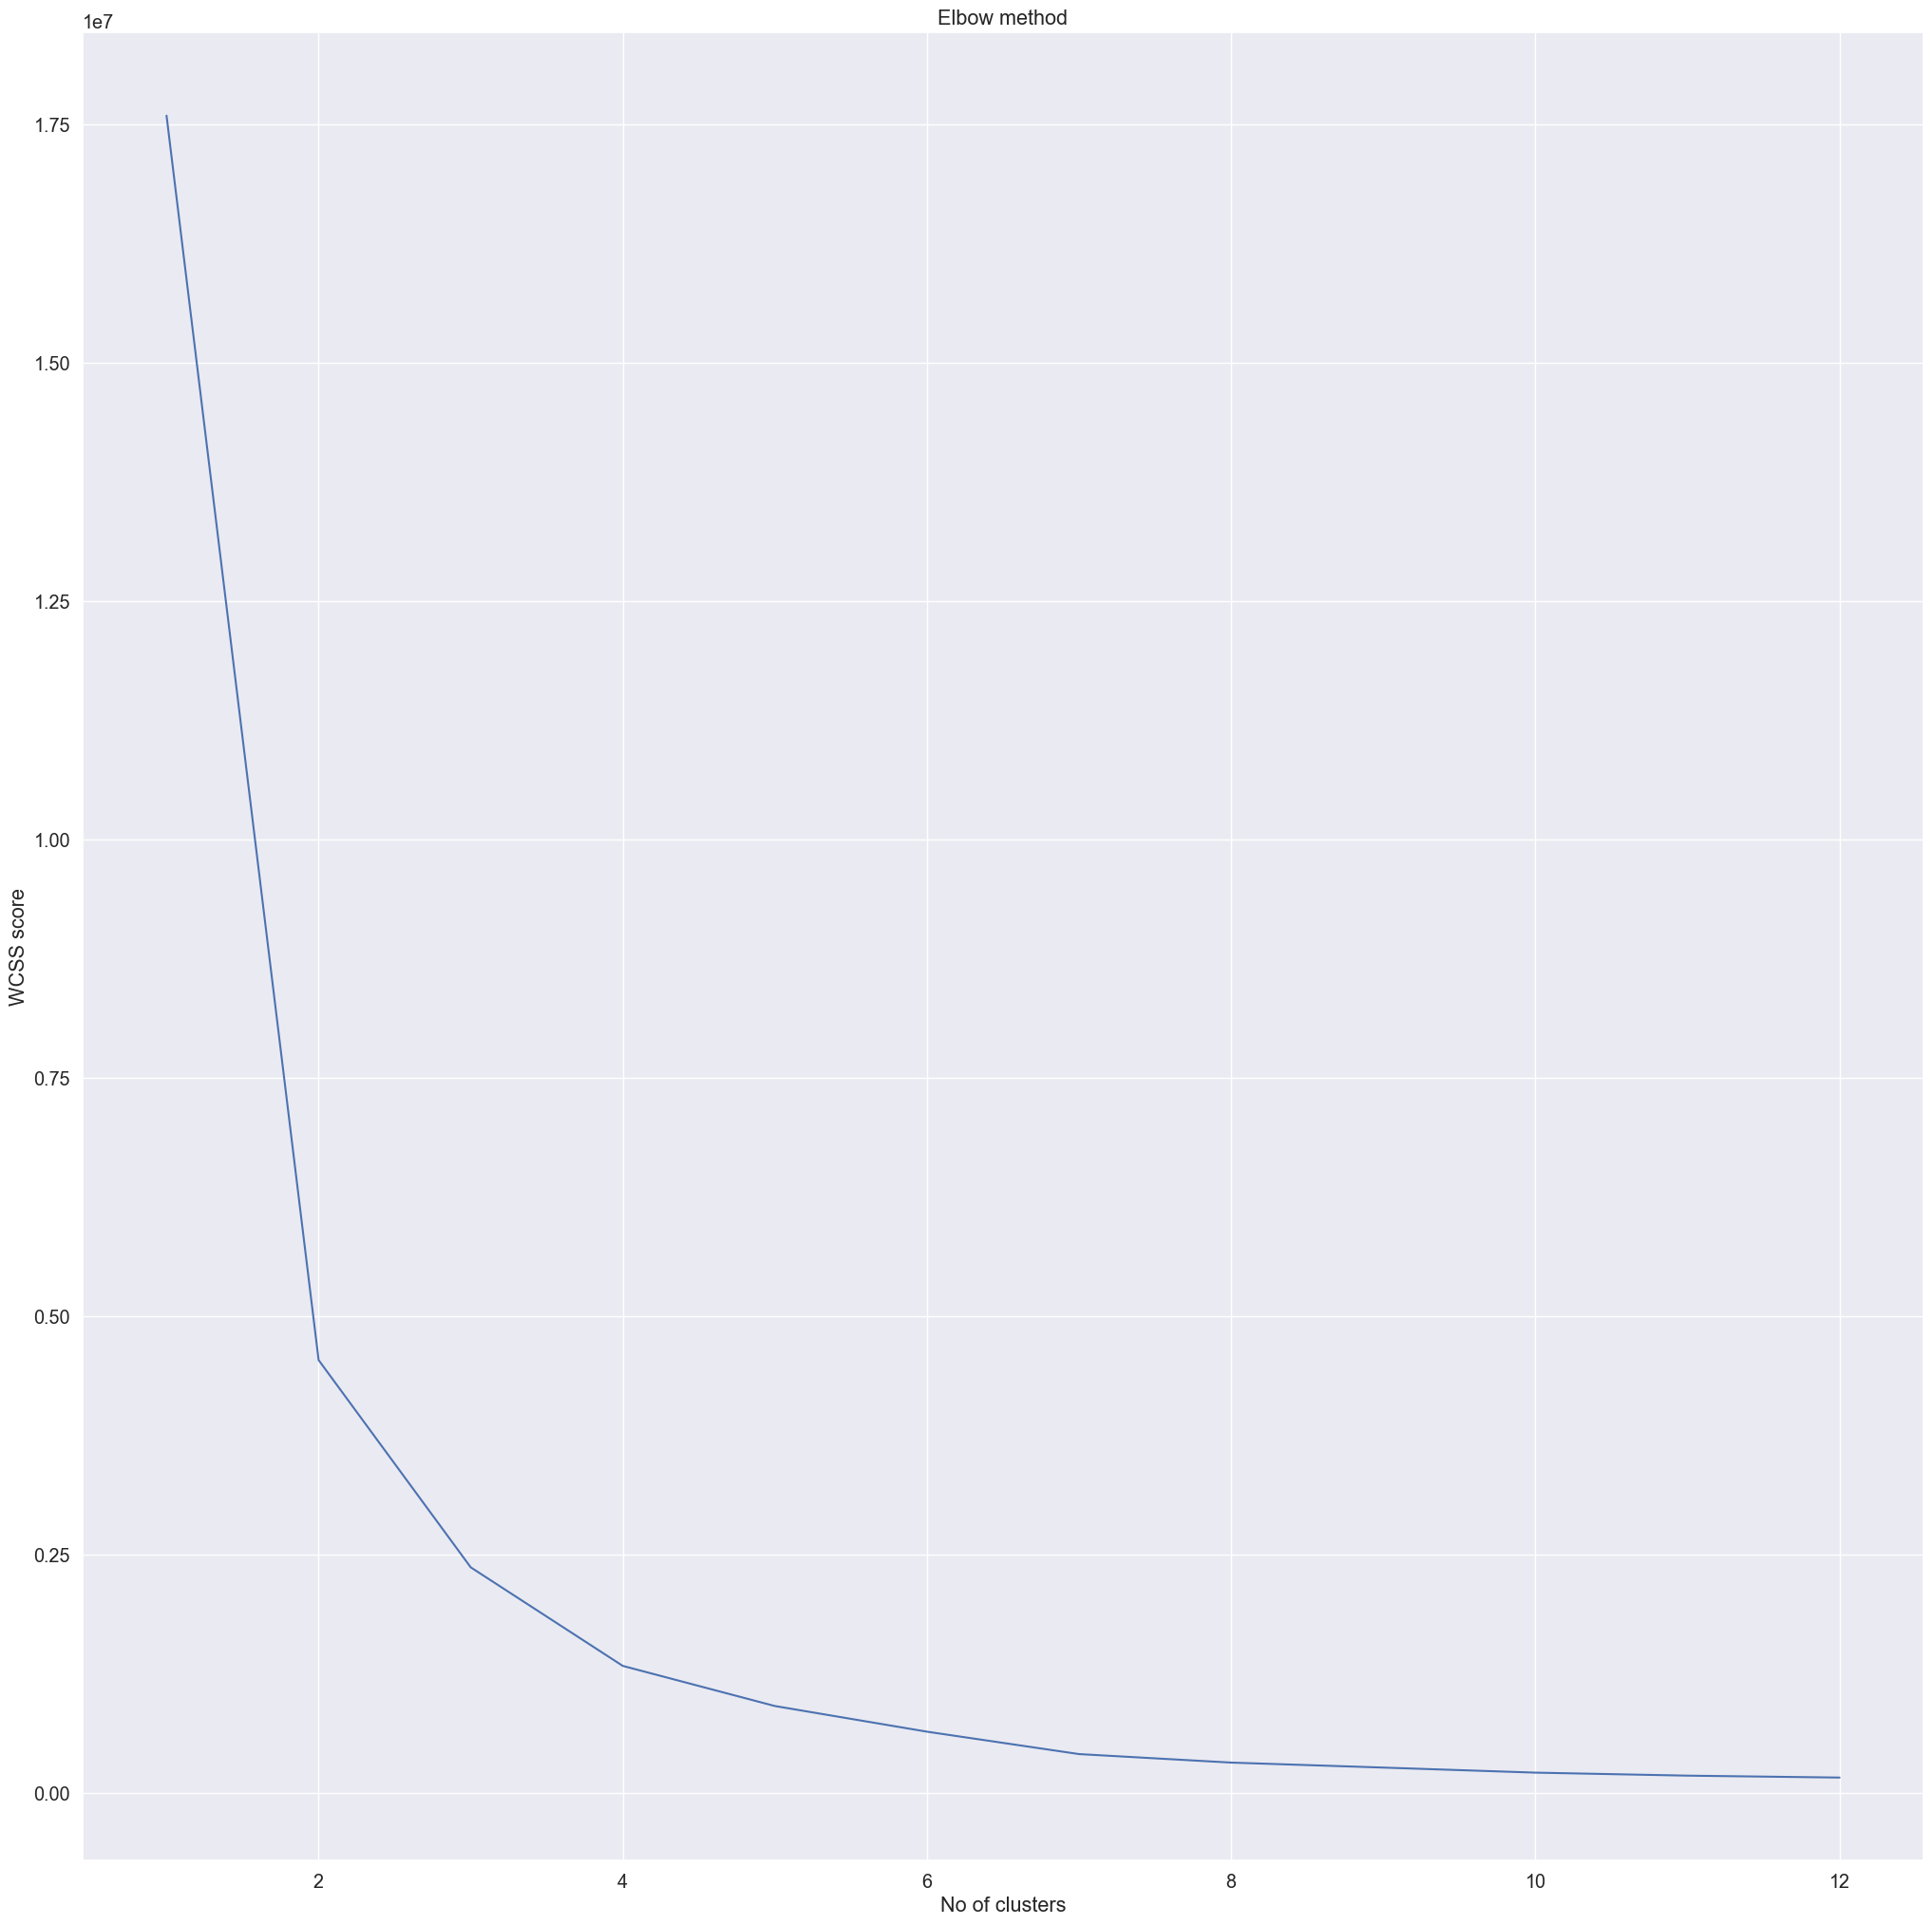

In [48]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.show()

by constructing this graph the optimum no of cluster is 4

In [59]:
#kmeans
kmeans = KMeans(n_clusters = 4,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1)

In [60]:
 y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [61]:
print( y_kmeans)

[1 1 3 3 2 3 3 3 1 1 3 3 3 1 3 3 3 1 3 1 2 2 1 1 1 2 3 3 1 1 3 3 1 3 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 3 1 3 3 3 1 1 1 3 3 0 2 0 2 0 0 2 0 0 2 2 1 0 0 1
 1 0 0 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 0 1 2 0 2 0 2 2 0 0 2 0 0 0 0 2 2
 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 2 2 0 0 1 2 0 2
 2 0 0 0 0 2 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 1 1 2]


In [62]:
from sklearn.metrics import silhouette_score

In [63]:
silhouette_sc = silhouette_score(data1,y_kmeans)
print(silhouette_sc)

0.5572288268257269


In [67]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# plotting dendogram to find the optimum no of clusters

In [68]:
import scipy.cluster.hierarchy as sch

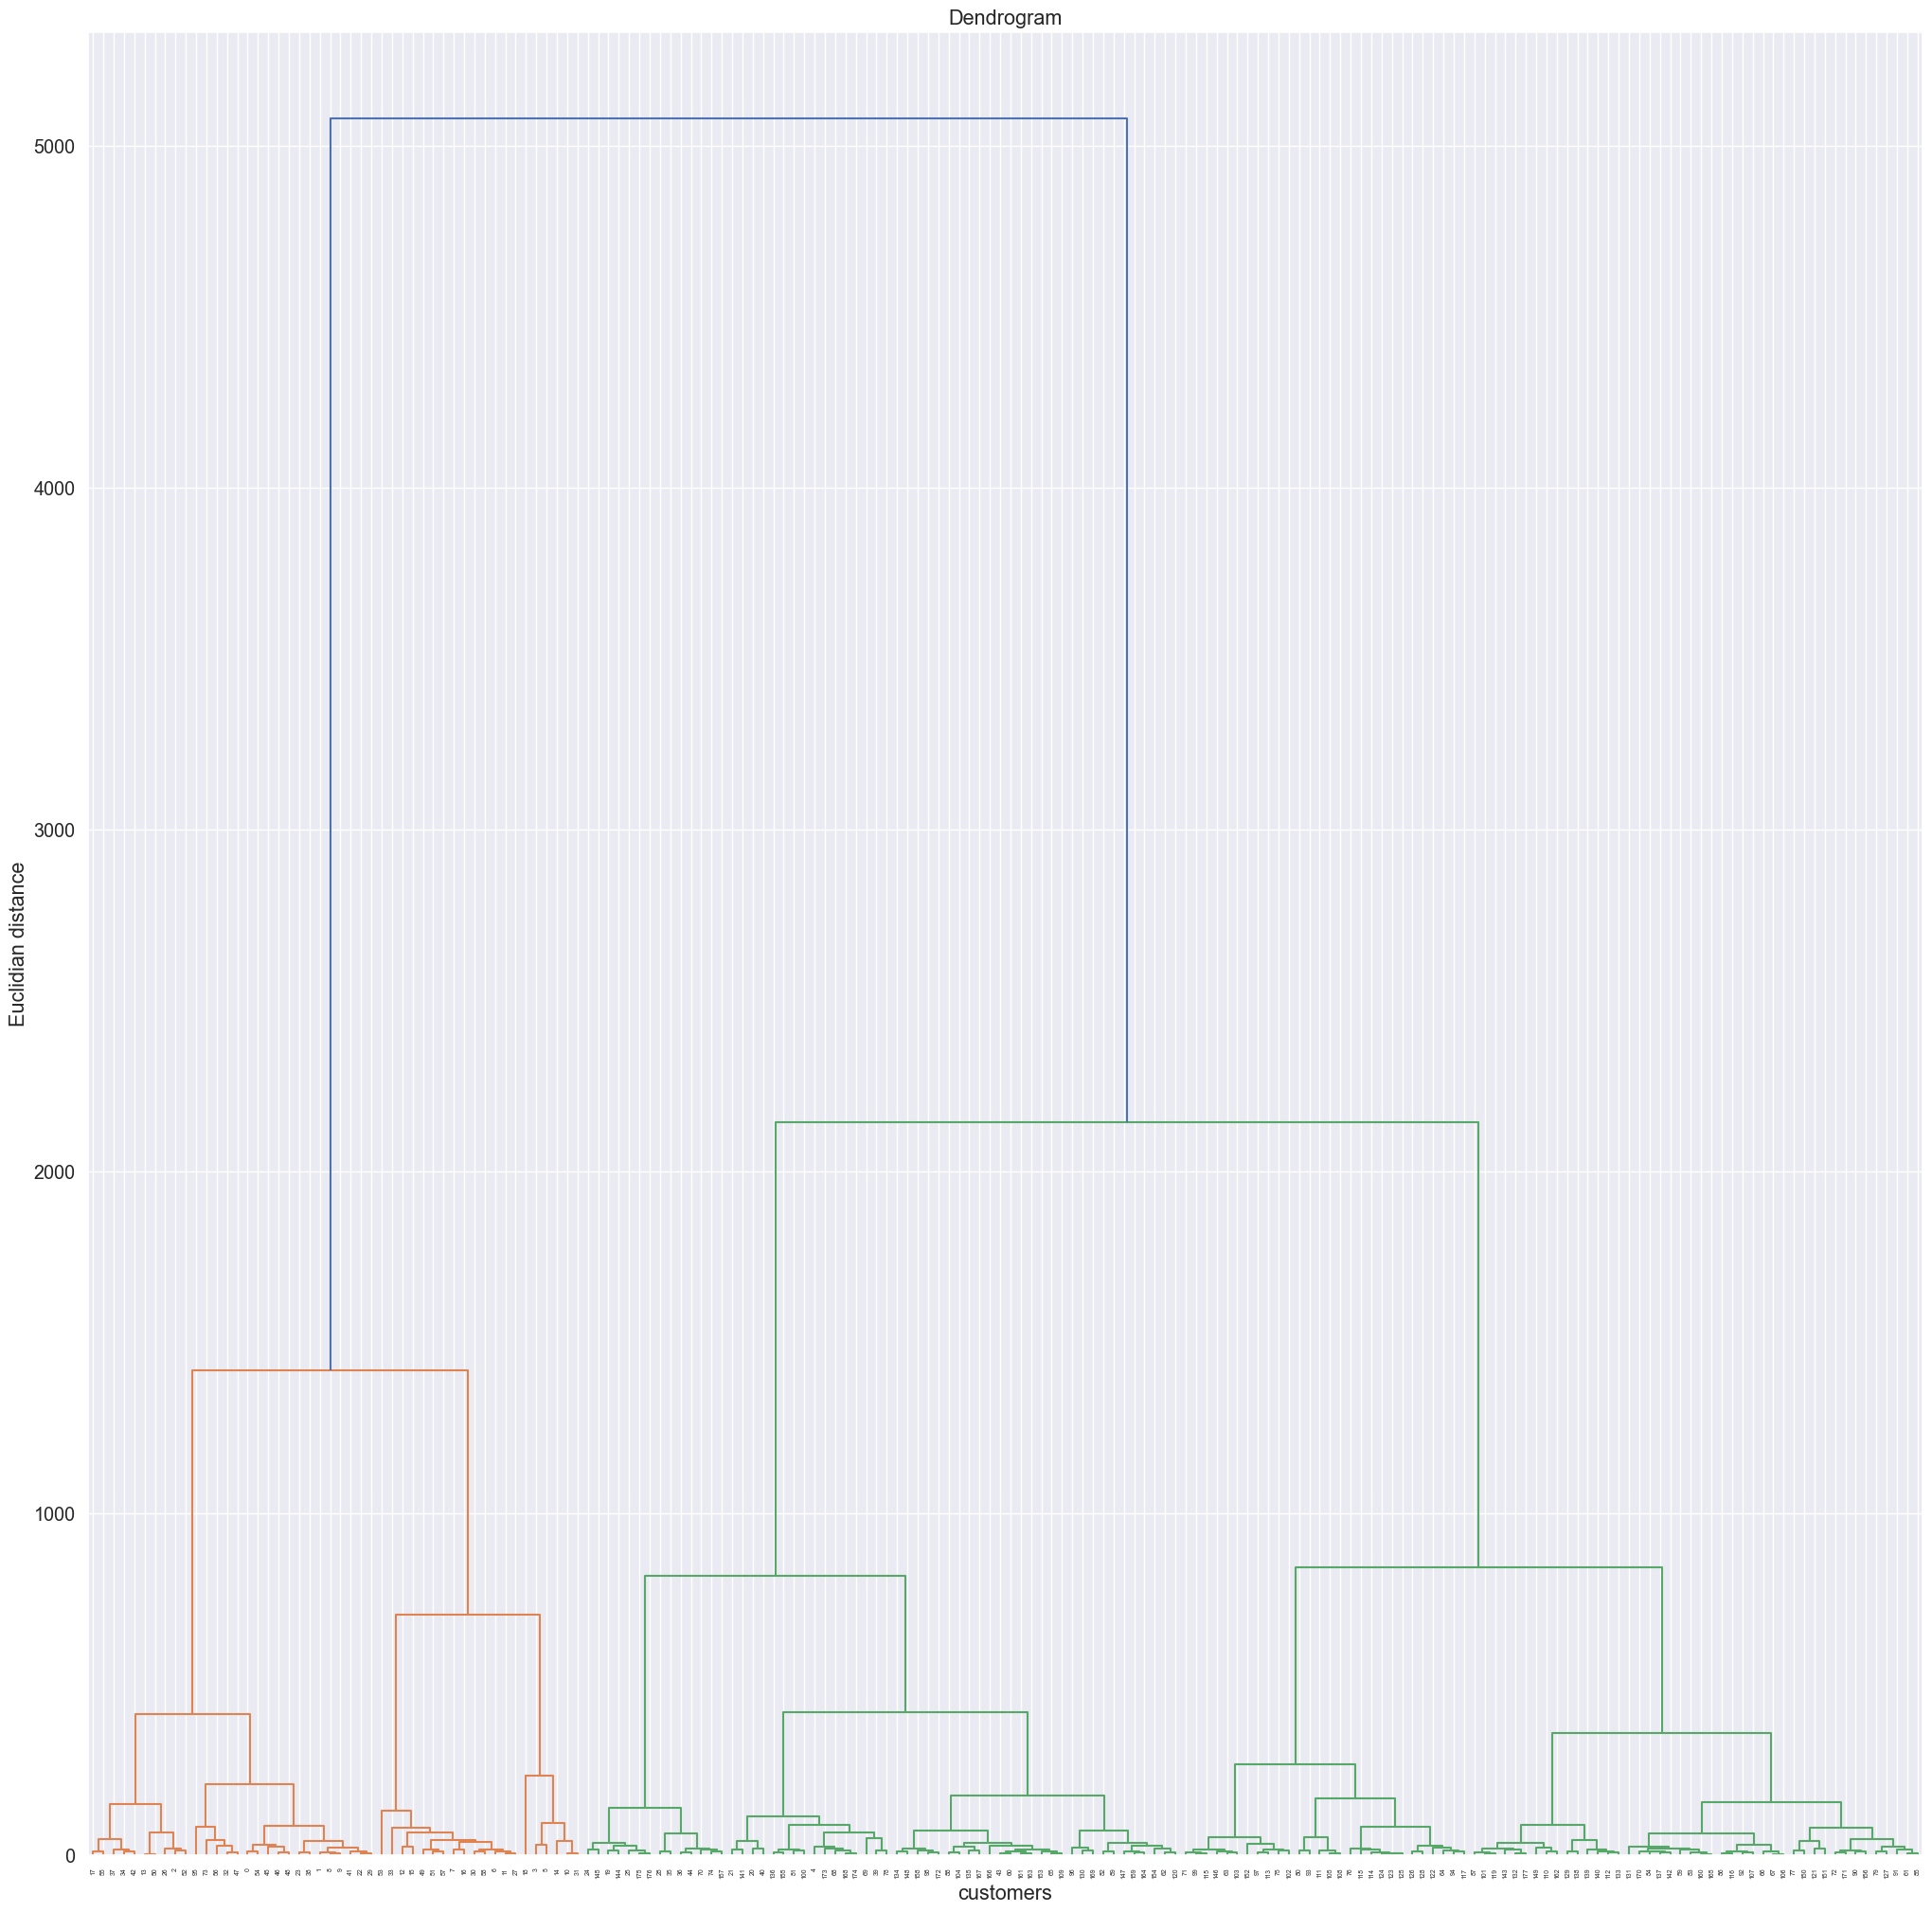

In [72]:
dendrogram =sch.dendrogram(sch.linkage(data,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidian distance')
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
hc = AgglomerativeClustering(n_clusters = 2,affinity='euclidean',linkage='ward')

In [75]:
y_hc = hc.fit_predict(data)

In [76]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [77]:
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(data,y_hc)
print(silhoutte_avg)

0.6587292996216912


# PCA

In [88]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler()
std_data.fit(data)

StandardScaler()

In [90]:
scaler_data = std_data.transform(data[data.columns])

In [91]:
scaler_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Reduce number of dimensions using PCA

In [93]:
from sklearn.decomposition import PCA
pca_data= PCA(2)
pca_data.fit(scaler_data)

PCA(n_components=2)

In [94]:
data_p = pca_data.transform(scaler_data)

Text(0, 0.5, 'Second principle component')

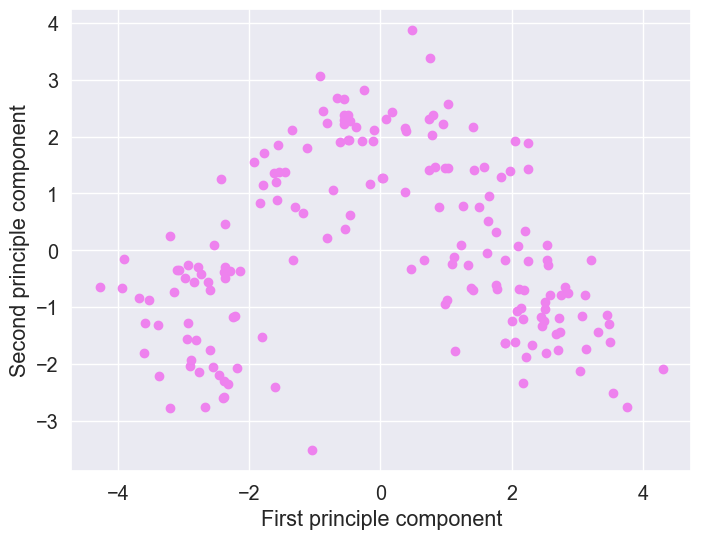

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(data_p[:,0],data_p[:,1], color = 'violet')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [96]:
data_p2 = pd.DataFrame(data_p)
data_p2

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [99]:
data_p.shape

(178, 2)

In [102]:
pca_data.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [103]:
np.sum(pca_data.explained_variance_ratio_)

0.5540633835693529

# DB Scan

In [111]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets

In [112]:
# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)


In [108]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [109]:
# Fit model and predict clusters
clusters = dbscan.fit_predict(X)

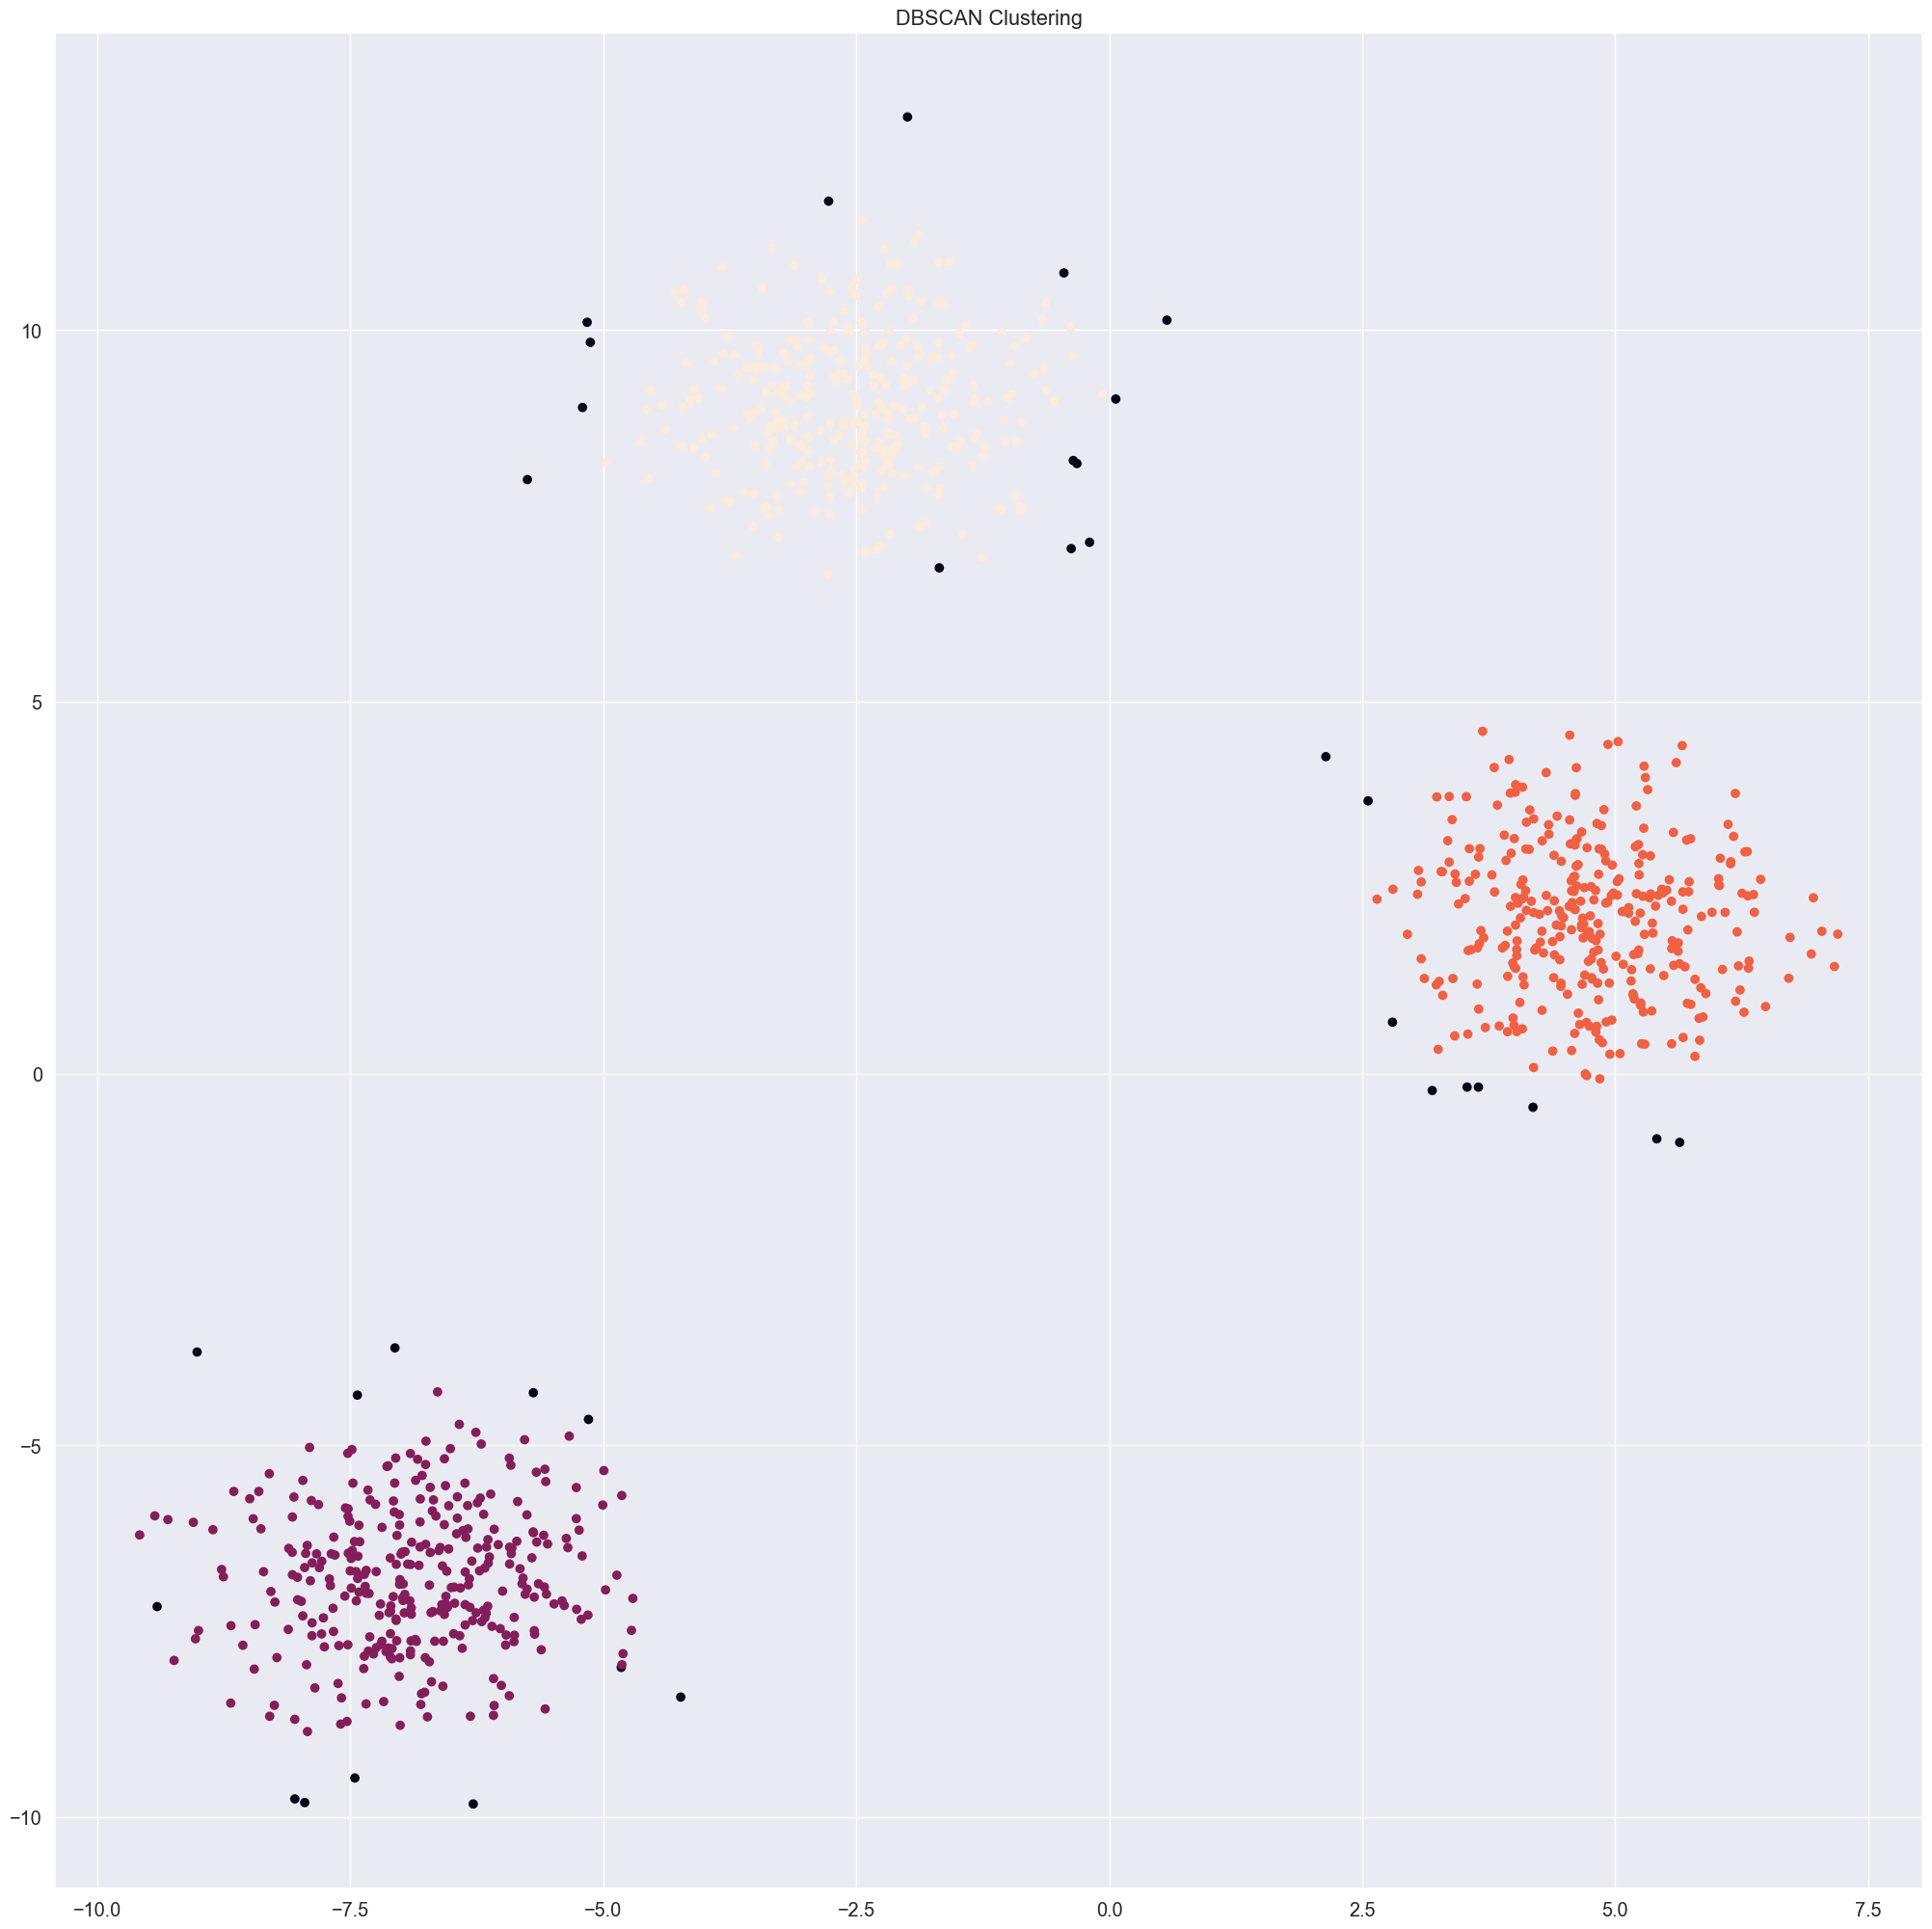

In [110]:

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('DBSCAN Clustering')
plt.show()